<a href="https://colab.research.google.com/github/gustavo-ifusp/edisc-analytics/blob/main/Analise_de_Dados_Indicadores_bolsa_PUB_junho_2021_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analises de Dados (Junho/2021) - parte 3 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. 

[Parte 1](https://colab.research.google.com/drive/1SsGKdqKwfN5brgigyqJK8uv-8BThSfOc?usp=sharing) <br>
[Parte 2](https://colab.research.google.com/drive/1Mw2-TUf3QOWngHBdqGK2dV0AgT37znJf?usp=sharing) 
<br>
[Parte 3](https://colab.research.google.com/drive/16wSpqxjdt6dL3i8egQtDGLFzJ4fnIBQG?usp=sharing) 
<br>
[Parte 4](https://colab.research.google.com/drive/1uglIxA9-NbHSYc9O2FN9k9Mnlp3-rsd2?usp=sharing) 
<br>
Nesta terceira parte o agente de analise é a coluna "name" que representa os tipos (resources).  

Buscarei criar um indicador para os "name" que representa os tipos (resources), recursos, ou melhor definido como atividades do E-disciplina, o Moodle da USP. A lógica desta primeiro indicador para esses recursos é o engajamento dos alunos para cada recurso, que será mensurado a partir da somatoria de clicks por ferramenta no ano de 2020. Selecionamos a fim de simplificação, institutos com relevancia maior afim didático e prático, para trabalhar o processo de filtragem de dados. 

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.




In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Aqui efetuarei a leitura dos dataframes para comparação:**<br>
São arquivos com 1 linha por "módulo" (= recurso ou atividade no Moodle) e a informação mais importante nas colunas é o número de "views" (cliques), quantos alunos eram inscritos neste ambiente e "usuários únicos" que clicaram neste módulo. Tem também uma coluna derivada fracstudents que é a fração dos alunos que clicaram pelo menos uma vez no módulo.

  * quantos cliques (por aluno) fizeram (agregando tudo)
  * quantos cliques por módulo
  * quantos cliques em por exemplo "fórum" ou "tarefa" (=assign)

In [32]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FD.csv"
base_FD = pd.read_csv(url1)
base_FD.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
6592,172,page,3187402,35.0,28.0,1.250000,121,7,0.289256,0.231405
10432,302,resource,2811229,5.0,4.0,1.250000,18,5,0.277778,0.222222
4142,106,url,3240468,60.0,51.0,1.176471,115,2,0.521739,0.443478


In [33]:
url2 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FE.csv"
base_FE = pd.read_csv(url2)
base_FE.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
223,2,resource,2884755,62.0,40.0,1.550000,141,1,0.439716,0.283688
750,15,url,2975371,28.0,12.0,2.333333,74,1,0.378378,0.162162
710,15,resource,2803566,1.0,1.0,1.000000,74,1,0.013514,0.013514


In [34]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FEA.csv"
base_FEA = pd.read_csv(url3)
base_FEA.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
13654,269,resource,3071417,14.0,8.0,1.750000,10,1,1.400000,0.800000
21053,403,resource,3007559,3.0,3.0,1.000000,18,1,0.166667,0.166667
23602,445,folder,3283097,14.0,9.0,1.555556,109,1,0.128440,0.082569


In [35]:
url4 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FFLCH.csv"
base_FFLCH = pd.read_csv(url4)
base_FFLCH.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
4528,120,resource,3177780,82.0,48.0,1.708333,115,5,0.713043,0.417391
31383,811,resource,2841576,37.0,29.0,1.275862,89,6,0.415730,0.325843
14535,325,resource,3082080,27.0,18.0,1.500000,26,4,1.038462,0.692308


In [36]:
url5 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FMRP.csv"
base_FMRP = pd.read_csv(url5)
base_FMRP.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
5438,106,quiz,2743270,547.0,29.0,18.862069,26,6,21.038462,1.115385
5687,111,folder,2810594,48.0,29.0,1.655172,101,12,0.475248,0.287129
22055,402,hvp,3106856,63.0,28.0,2.250000,27,9,2.333333,1.037037


In [37]:
url6 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-IF.csv"
base_IF = pd.read_csv(url6)
base_IF.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
5972,102,resource,3279265,47.0,33.0,1.424242,120,2,0.391667,0.275000
5510,95,resource,3251188,83.0,37.0,2.243243,114,6,0.728070,0.324561
6315,107,resource,3179282,43.0,22.0,1.954545,90,1,0.477778,0.244444


In [38]:
url7 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/docdistur.csv"
base_doc = pd.read_csv(url7)
base_doc['sglund'] = base_doc['sglund'].astype('object')
base_doc['ano'] = base_doc['ano'].astype('int64')
base_doc.rename(columns={'sglund':'unidade'}, inplace = True)
base_doc = base_doc[base_doc["ano"] == 2020]
base_doc.sample(2)

,unidade,ano,docentes,disciplinas,turmas
902,IF,2020,114,100,467
856,IEB,2020,12,13,20


In [39]:
url8 = "https://raw.githubusercontent.com/gustavo-ifusp/edisc-analytics/main/data/raw/mc-24-11-2020.csv"
dados = pd.read_csv(url8)
dados.iloc[-4:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse
38290,83726,https://edisciplinas.usp.br/course/view.php?id...,2,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,101,0.0,0,0,0,0,0.149069,3,104,101,0,1,0,2,0,NCC5701 - Metodologia Científica e Estudos Clí...,NCC5701--2020,NCC5701.2.2,NCC,FMRP,2020,2,0,1,0,0,4,0,0,1,biologicas,POS,NCC5701,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38291,83948,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,1,0,0,0.693147,2,2,1,0,1,0,0,0,LES5780 - Desenvolvimento Econômico (2020),LES5780--2020,LES5780.11.2,ESALQ,ESALQ,2020,2,0,1,0,0,2,0,0,1,humanas,POS,LES5780,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38292,83959,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,teste_marcos,teste_marcos,NaN,FFLCH,FFLCH,2020,2,0,0,0,0,1,0,0,0,humanas,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38293,83965,https://edisciplinas.usp.br/course/view.php?id...,3,1,1,1,1,1,0,1,1,4,1,0.0,7,1,0.0,0,0,2,0,8,0.0,1,0.0,0,6,0,0,2.517794,18,42,15,4,7,1,12,2,STI FMRP 2020,STI FMRP 2020,NaN,STI,FMRP,2020,2,0,1,0,0,0,0,0,0,biologicas,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
soma_views_FD_por_name = base_FD.groupby(by=['name'])['views'].sum()
soma_views_FD_por_name

name
activequiz             592.0
assign             1495790.0
attendance            3349.0
bigbluebuttonbn      24346.0
book                  1426.0
chat                   971.0
checklist              431.0
choice                6312.0
choicegroup          11001.0
data                   789.0
dialogue              1887.0
feedback                 0.0
folder               32636.0
forum               210187.0
glossary              1601.0
label                    0.0
lesson                5627.0
oublog                 109.0
ouwiki                   1.0
page                  7699.0
publication           2042.0
questionnaire         7341.0
quiz                235846.0
resource            735904.0
scheduler               12.0
studentquiz              2.0
url                  67704.0
wiki                 20883.0
workshop              6098.0
Name: views, dtype: float64

In [41]:
soma_views_FE_por_name = base_FE.groupby(by=['name'])['views'].sum()
soma_views_FEA_por_name = base_FEA.groupby(by=['name'])['views'].sum()
soma_views_FFLCH_por_name = base_FFLCH.groupby(by=['name'])['views'].sum()
soma_views_FMRP_por_name = base_FMRP.groupby(by=['name'])['views'].sum()
soma_views_IF_por_name = base_IF.groupby(by=['name'])['views'].sum()

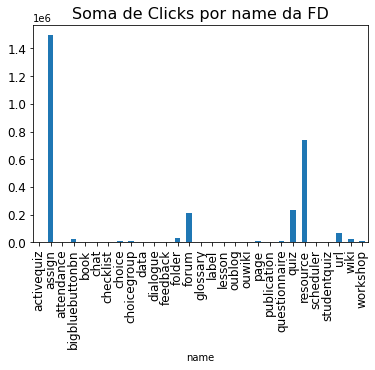

In [42]:
soma_views_FD_por_name.plot(kind='bar')
plt.title('Soma de Clicks por name da FD', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()

In [43]:
df = pd.DataFrame({
                   'FMRP': soma_views_FMRP_por_name,
                   'FEA': soma_views_FEA_por_name,
                   'IF': soma_views_IF_por_name,
                   'FFLCH': soma_views_FFLCH_por_name,
                   'FD': soma_views_FD_por_name,
                   'FE': soma_views_FE_por_name,
                   })
df = df.fillna(0)
df.reset_index(level=0, inplace=True)
df = df.rename(columns={'index': 'name'})
df

,name,FMRP,FEA,IF,FFLCH,FD,FE
0,activequiz,7899.0,6544.0,831.0,39.0,592.0,0.0
1,assign,741658.0,1589105.0,777534.0,1258594.0,1495790.0,210048.0
2,attendance,90251.0,84218.0,5592.0,7073.0,3349.0,778.0
3,bigbluebuttonbn,168040.0,1655.0,14389.0,46258.0,24346.0,470.0
4,book,2834.0,3457.0,1029.0,2463.0,1426.0,368.0
5,chat,3056.0,3859.0,1927.0,2597.0,971.0,1.0
6,checklist,869.0,618.0,1184.0,72.0,431.0,0.0
7,choice,4441.0,1075.0,1749.0,3205.0,6312.0,262.0
8,choicegroup,3443.0,2460.0,3118.0,4247.0,11001.0,282.0
9,data,12966.0,361.0,2379.0,2169.0,789.0,75.0


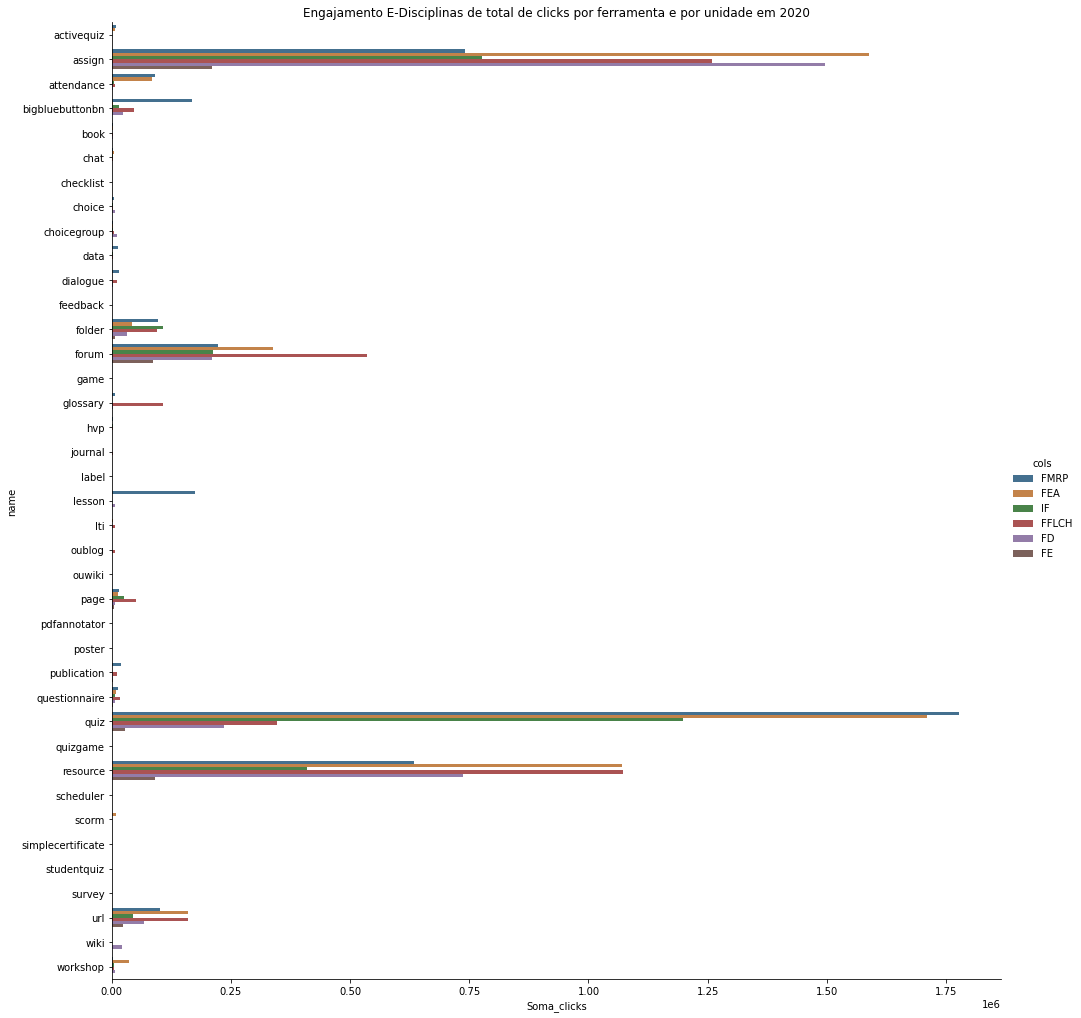

In [44]:
plt = df.melt('name', var_name='cols', value_name='Soma_clicks')
g = sns.catplot(y="name", x="Soma_clicks", hue='cols', data=plt, kind="bar", height=14,saturation=.5)
g.set(title = "Engajamento E-Disciplinas de total de clicks por ferramenta e por unidade em 2020")

#**Resultado filtrando as ferramentas mais usadas.**

In [45]:
df_filtro_1 = df.loc[df['name'] == 'quiz']
df_filtro_2 = df.loc[df['name'] == 'assign']
df_filtro_3 = df.loc[df['name'] == 'resource']
df_filtro_4 = df.loc[df['name'] == 'forum']
df_filtro_5 = df.loc[df['name'] == 'url']
df_filtro_6 = df.loc[df['name'] == 'folder']
df_filtro = pd.concat([df_filtro_1, df_filtro_2, df_filtro_3, df_filtro_4, df_filtro_5, df_filtro_6])
df_filtro

,name,FMRP,FEA,IF,FFLCH,FD,FE
28,quiz,1776449.0,1709735.0,1197452.0,347462.0,235846.0,28559.0
1,assign,741658.0,1589105.0,777534.0,1258594.0,1495790.0,210048.0
30,resource,633539.0,1070205.0,409068.0,1073055.0,735904.0,91108.0
13,forum,222070.0,338896.0,211670.0,536305.0,210187.0,86112.0
36,url,101504.0,160053.0,44957.0,160732.0,67704.0,23452.0
12,folder,95836.0,42420.0,106975.0,95289.0,32636.0,6167.0


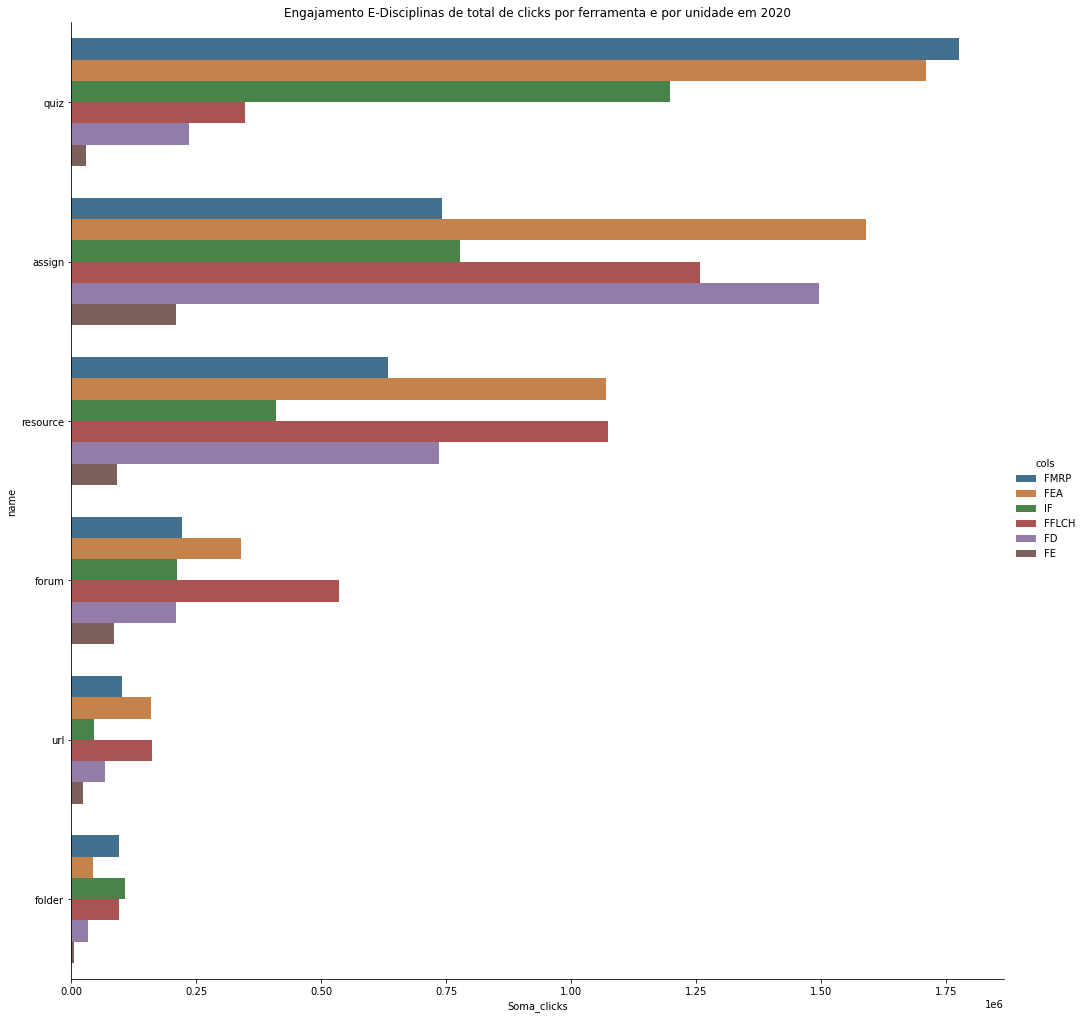

In [46]:
plt = df_filtro.melt('name', var_name='cols', value_name='Soma_clicks')
g = sns.catplot(y="name", x="Soma_clicks", hue='cols', data=plt, kind="bar", height=14,saturation=.5)
g.set(title = "Engajamento E-Disciplinas de total de clicks por ferramenta e por unidade em 2020")

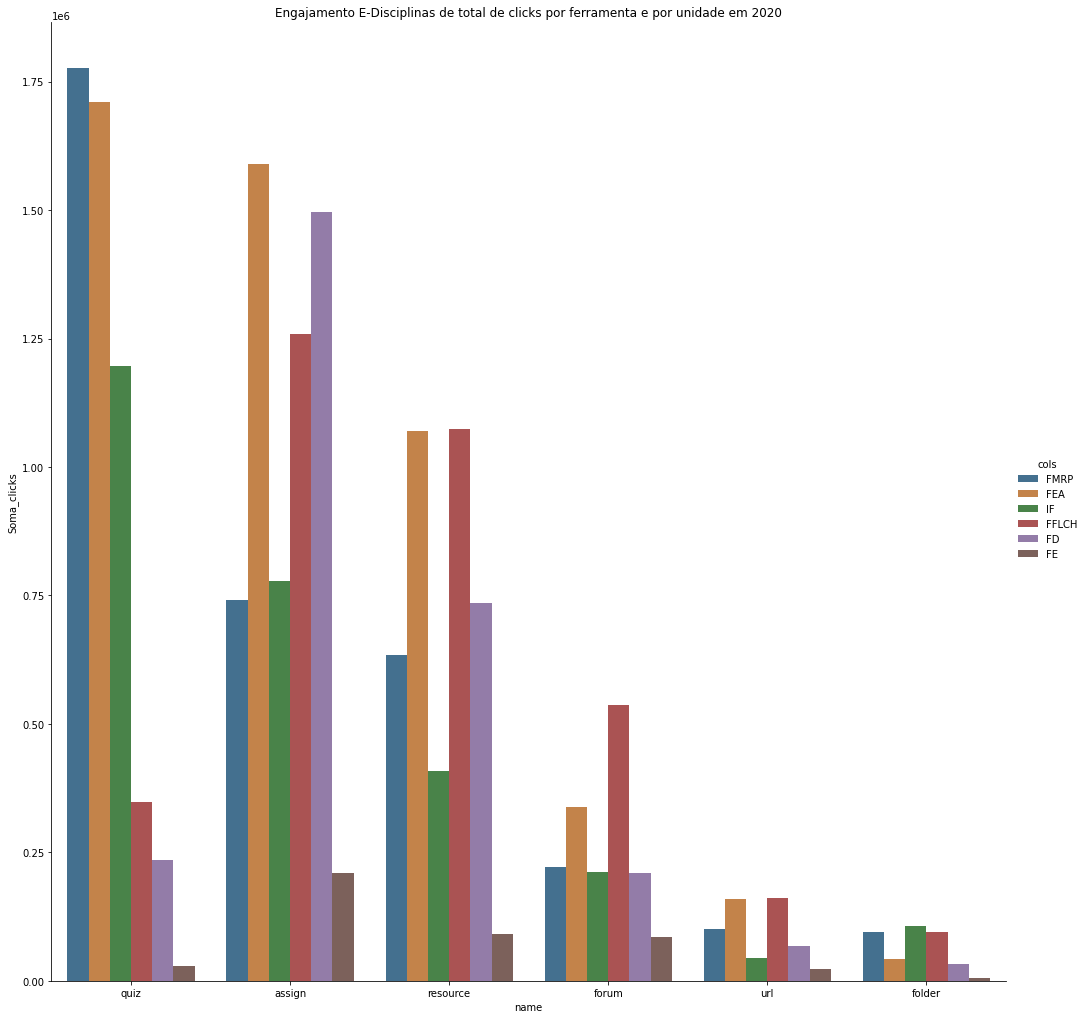

In [47]:
plt = df_filtro.melt('name', var_name='cols', value_name='Soma_clicks')
g = sns.catplot(x="name", y="Soma_clicks", hue='cols', data=plt, kind="bar", height=14,saturation=.5)
g.set(title = "Engajamento E-Disciplinas de total de clicks por ferramenta e por unidade em 2020")